### Preparação dos Dados

### Tarefa

Preprocessamento dos dados de forma que permita melhores visualizações e generalizações por parte dos modelos.


### Índice

[1. Carregar dados e bibliotecas](#1.-Carregar-dados-e-bibliotecas)<br>
[2. Limpeza dos Dados](#2.-Limpeza-dos-Dados)<br>
        [-  2.1 Visão Geral](#2.1-Visão-Geral)<br>
    [-  2.2 Concertando Colunas](#2.2-Concertando-Colunas)<br>
    [-  2.3 Fix Dtypes](#2.3-Fix-Dtypes)<br>
    [-  2.4 Fix Mês](#2.4-Fix-Mês)<br>
    [-  2.5 Fix Pais](#2.5-Fix-Pais)<br>
    [3. Novos Atributos](#3.-Novos-Atributos)<br>
    [-  3.1 Abreviação Cargo](#3.1-Abreviação-Cargo)<br>
    [-  3.2 Nível Cargo](#3.2-Nível-Cargo)<br>
    [-  3.3 Regra Alcance Parcial](#3.3-Regra-Alcance-Parcial)<br>




## 1. Carregar dados e bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../data/raw/ambev-final-dataset.csv', encoding='utf-8', low_memory=False)
print('Base com {} linhas e {} colunas.'.format(*df.shape))

Base com 270633 linhas e 38 colunas.


In [3]:
# Ajeitando a Nomenclatura
nome_colunas = [
    'mes', 'pais', 'mundo', 'area_regional', 'unidade',
    'grupo_cargo', 'cargo', 'grade', 'banda', 'area', 'id_funcionario',
    'id_gestor', 'id_kpi', 'diretoria', 'area_diretoria',
    'funcao', 'tipo_meta', 'categoria_kpi', 'nome_kpi', 'peso_kpi',
    'prazo', 'regra_alcance_parcial', 'meta_projeto', 'pct_ating_mes',
    'pct_pts_mes', 'pct_acum_mes', 'pct_ating_acum', 'pct_pts_acumulado',
    'pct_acum_acumulado', 'pct_ating_fim_exer', 'pct_pts_fim_exer',
    'pct_acum_fim_exer', 'status_meta', 'c33', 'c34', 'c35', 'c36', 'c37']
df.columns = nome_colunas

## 2. Limpeza de Dados

### 2.1 Visão Geral

Exploração superficial do dataset.

In [4]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
mes,270633,NaN,NaN,NaN,80149.4,28171.7,32017,62017,82017,102017,122017
pais,270633,9,Brasil,230229,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mundo,270501,30,Supply,108891,NaN,NaN,NaN,NaN,NaN,NaN,NaN
area_regional,270633,NaN,NaN,NaN,10.9267,6.96919,0,4,11,19,22
unidade,270633,NaN,NaN,NaN,181.461,100.705,0,94,221,264,331
grupo_cargo,230099,140,SUPERVISOR FABRIL,45482,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cargo,262118,339,ANALISTA I,18658,NaN,NaN,NaN,NaN,NaN,NaN,NaN
grade,262118,NaN,NaN,NaN,10.5857,1.96224,1,9,10,12,17
banda,262118,23,VII-B,41953,NaN,NaN,NaN,NaN,NaN,NaN,NaN
area,262116,113,PACKAGING,24771,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Percentual de dados não faltantes')

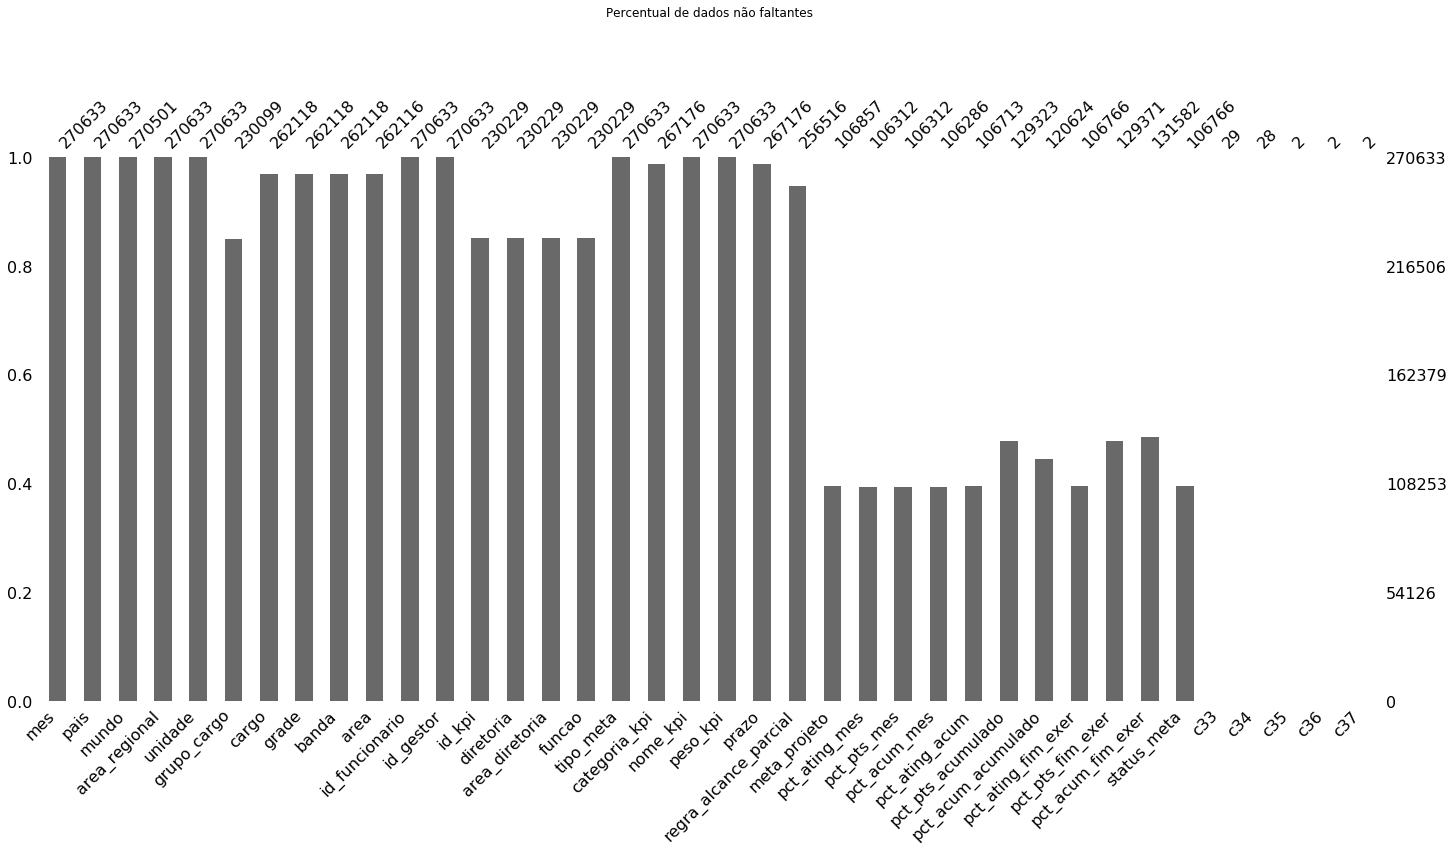

In [5]:
g = missingno.bar(df)
g.set_title('Percentual de dados não faltantes', pad=80)

In [6]:
df[~df['c33'].isna()].head()

,mes,pais,mundo,area_regional,unidade,grupo_cargo,cargo,grade,banda,area,...,pct_acum_acumulado,pct_ating_fim_exer,pct_pts_fim_exer,pct_acum_fim_exer,status_meta,c33,c34,c35,c36,c37
9610,32017,Brasil,CE,1,275,ESPECIALISTA,ESPECIALISTA IV,15.0,V-A,MARKETING,...,100.0,100.0,20.0,100.0,100,20,100.0,100.0,20.0,Monitoramento Aprovado
31343,42017,Brasil,CE,1,275,ESPECIALISTA,ESPECIALISTA IV,15.0,V-A,MARKETING,...,100.0,100.0,20.0,100.0,100,20,100.0,100.0,20.0,Monitoramento Aprovado
80305,62017,Brasil,CE,1,275,ESPECIALISTA,ESPECIALISTA IV,15.0,V-A,MARKETING,...,100.0,20.0,100.0,100.0,20,Monitoramento Aprovado,NaN,NaN,NaN,NaN
231383,62017,PanamÁ¡,Finance,4,258,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,100.0,40.0,NaN,100,40.0,NaN,NaN,NaN
231385,62017,PanamÁ¡,Finance,4,258,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,100.0,30.0,NaN,100,30.0,NaN,NaN,NaN


#### Notas e Observações

* Observa-se que há um problema na coluna **Regra Alcance Parcial**, pois em alguns casos seu texto se divide em outras colunas, causando a criação de **colunas a mais não alinhadas****** com o resto da base.

=============================================================

### 2.2 Concertando Colunas

Como foi observado, a coluna  **Regra Alcance Parcial** em algumas linhas está quebrada, gerando colunas a mais e quebrando a ordem da colunas. Para alinhar as colunas sem ter que deletar as linhas com problema cada linha será tratada de forma a se obter o texto inteiro da coluna  **Regra Alcance Parcial** e alinhar as outras colunas. Por fim as  serão removidas as colunas extras.

In [7]:
# distribuição antes de Meta Projeto 
df.meta_projeto.value_counts()

Não                                                                   101892
Sim                                                                     4818
05% hs paradas: 80% dos pontos                                            65
 available at SDCA+"                                                      34
 Self-assesment                                                           26
 Control and Gobernance) is achived"                                       8
 control and government) is received"                                      7
 control and goverment) is achieved."                                      4
5% goal                                                                    2
 validated with VP and implemented in the market = 60% of points""         1
Name: meta_projeto, dtype: int64

In [8]:
df['UltNAN'] = np.nan # coluna de nan para usar na limpeza
colunas_problema = nome_colunas[21:]

In [9]:
# concertando colunas
for i in range(6):
    idxs = df[~df.meta_projeto.isin(['Sim', 'Não', np.nan, np.NAN])].index
    df.loc[idxs, 'regra_alcance_parcial'] = df.loc[idxs, 'regra_alcance_parcial'].fillna('').astype(str) + ' ' +  df.loc[idxs, 'meta_projeto'].fillna('').astype(str)
    for i in range(1, len(colunas_problema) - 1):
        df.loc[idxs, colunas_problema[i]] = df.loc[idxs, colunas_problema[i+1]].values

In [10]:
# removendo colunas
df.drop([ 'c33', 'c34', 'c35', 'c36', 'c37', 'UltNAN'], axis=1, inplace=True)

In [11]:
# distribuição de Meta Projeto depois da limpeza das colunas
df.meta_projeto.value_counts()

Não    101895
Sim      4818
Name: meta_projeto, dtype: int64

### 2.3 Fix Dtypes

Em geral os dados parecer ser todos categoricos fora os relacionados a méta, ajustando os tipos fica mais fácil mexer nos dados mais a frente.

In [12]:
def detalha_colunas(df):
    for col in df.columns:
        cnum = df.columns.get_loc(col)
        dtype = df[col].dtype
        nuniques = df[col].nunique()
        examples = df[col].unique()[:1]
        print('tipo {}\tcoluna {:20}\texemplo {}'.format(dtype, col, *examples))

In [13]:
detalha_colunas(df)

tipo int64	coluna mes                 	exemplo 32017
tipo object	coluna pais                	exemplo Brasil
tipo object	coluna mundo               	exemplo Sales
tipo int64	coluna area_regional       	exemplo 10
tipo int64	coluna unidade             	exemplo 78
tipo object	coluna grupo_cargo         	exemplo GER DE VENDAS REVENDA
tipo object	coluna cargo               	exemplo GERENTE DE VENDAS REVENDA II
tipo float64	coluna grade               	exemplo 12.0
tipo object	coluna banda               	exemplo VI-B
tipo object	coluna area                	exemplo GERÊNCIA CD
tipo int64	coluna id_funcionario      	exemplo 2774
tipo int64	coluna id_gestor           	exemplo 237
tipo object	coluna id_kpi              	exemplo 001VA0561
tipo object	coluna diretoria           	exemplo Diretoria de Vendas e Distribuição
tipo object	coluna area_diretoria      	exemplo AC
tipo object	coluna funcao              	exemplo GER DE VENDAS
tipo object	coluna tipo_meta           	exemplo Mandatório
tipo obj

In [14]:
# Colocando as colunas não relacionadas a meta como texto
df[df.columns[:23]] = df[df.columns[:23]].astype('str')
df['status_meta'] = df['status_meta'].astype('str')
df[df.columns[23:32]] = df[df.columns[23:32]].astype(np.number)

In [15]:
detalha_colunas(df)

tipo object	coluna mes                 	exemplo 32017
tipo object	coluna pais                	exemplo Brasil
tipo object	coluna mundo               	exemplo Sales
tipo object	coluna area_regional       	exemplo 10
tipo object	coluna unidade             	exemplo 78
tipo object	coluna grupo_cargo         	exemplo GER DE VENDAS REVENDA
tipo object	coluna cargo               	exemplo GERENTE DE VENDAS REVENDA II
tipo object	coluna grade               	exemplo 12.0
tipo object	coluna banda               	exemplo VI-B
tipo object	coluna area                	exemplo GERÊNCIA CD
tipo object	coluna id_funcionario      	exemplo 2774
tipo object	coluna id_gestor           	exemplo 237
tipo object	coluna id_kpi              	exemplo 001VA0561
tipo object	coluna diretoria           	exemplo Diretoria de Vendas e Distribuição
tipo object	coluna area_diretoria      	exemplo AC
tipo object	coluna funcao              	exemplo GER DE VENDAS
tipo object	coluna tipo_meta           	exemplo Mandatório
tipo

### 2.4 Fix Mês

A coluna `mes` está com uma formatação um não muito legal.

In [16]:
print(*df.mes.unique(), sep='-')

32017-42017-52017-62017-72017-82017-92017-102017-112017-122017


In [17]:
df['mes'] = df.mes.str.extract('(^.*)(?=.{4}$)').astype(int)

In [18]:
print(*df.mes.unique(), sep='-')

3-4-5-6-7-8-9-10-11-12


### 2.5 Fix Pais

Essa coluna está ok, mas temos um problema de encoding para o valor Panama.

In [19]:
print(*df.pais.unique(), sep=' - ')

Brasil - Barbados - Cuba - Dominica - Guatemala - PanamÁ¡ - Rep. Dominicana - Saint Vincent - Panama


In [20]:
df.loc[df.pais == 'PanamÁ¡', 'pais'] = 'Panama'

In [21]:
print(*df.pais.unique(), sep=' - ')

Brasil - Barbados - Cuba - Dominica - Guatemala - Panama - Rep. Dominicana - Saint Vincent


In [22]:
df.pais.value_counts()

Brasil             230229
Rep. Dominicana     24120
Panama               8279
Barbados             4131
Guatemala            2799
Saint Vincent         753
Dominica              262
Cuba                   60
Name: pais, dtype: int64

### 2.6 Fix NLP 

As colunas que possuem textos estão com os valores quebrados e não padronizados, dessa forma uma aplicação de algumas formas básicas de formatação de texto pode ajudar dimunuir o número de valores distintos.

In [23]:
# Exemplo colunas sobre o cargo
print('Coluna: grupo_cargo')
print(*df.grupo_cargo.unique()[:10], sep='   ')
print('nunique: {}'.format(df.grupo_cargo.nunique()))
print('\nColuna: cargo')
print(*df.cargo.unique()[:10], sep='   ')
print('nunique: {}'.format(df.cargo.nunique()))

Coluna: grupo_cargo
GER DE VENDAS REVENDA   SUPERVISOR FABRIL   ESPECIALISTA   GER ENGENHARIA   COORD   GER OPERAçÁ•ES DISTRIB ROTA   COORD FABRIL   ANALISTA FABRIL   GER OPERAçÁ•ES E DISTRIB   ENGENHEIRO FABRIL
nunique: 141

Coluna: cargo
GERENTE DE VENDAS REVENDA II   SUPERVISOR SENIOR FABRIL   ESPECIALISTA II   GER ENGENHARIA III   COORDENADOR II   GER OPERAçÁ•ES E DISTRIB ROTA I   ESPECIALISTA I   COORDENADOR PLENO FABRIL   ANALISTA SENIOR FABRIL   GER OPERAçÁ•ES E DISTRIB IV
nunique: 340


In [31]:
# Aplicando a transformação
cols = ['cargo', 'grupo_cargo', 'area', 'diretoria', 'mundo', 'area_diretoria', 'funcao', 
 'banda', 'tipo_meta', 'categoria_kpi', 'regra_alcance_parcial']
for col in cols:
    print('\nColuna', col)
    print('Unique antes:  {:4}'.format(df[col].nunique()))
    df[col] = df[col].str.lower().str.replace(r'[^\w\s]+', '')
    df[col] = df[col].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
    print('Unique depois: {:4}'.format(df[col].nunique()))


Coluna cargo
Unique antes:   340
Unique depois:  330

Coluna grupo_cargo
Unique antes:   140
Unique depois:  140

Coluna area
Unique antes:   112
Unique depois:  108

Coluna diretoria
Unique antes:    15
Unique depois:   15

Coluna mundo
Unique antes:    31
Unique depois:   31

Coluna area_diretoria
Unique antes:     9
Unique depois:    9

Coluna funcao
Unique antes:    94
Unique depois:   94

Coluna banda
Unique antes:    15
Unique depois:   15

Coluna tipo_meta
Unique antes:     9
Unique depois:    9

Coluna categoria_kpi
Unique antes:   139
Unique depois:  135

Coluna regra_alcance_parcial
Unique antes:  1464
Unique depois: 1441


### 3. Novos Atributos

### 3.1 Abreviação Cargo

Muitos nomes de cargo tem no começo do texto um n-gram generalizado do tipo de cargo. (e.g. Gerente -> ger)

In [34]:
df.columns

Index(['mes', 'pais', 'mundo', 'area_regional', 'unidade', 'grupo_cargo',
       'cargo', 'grade', 'banda', 'area', 'id_funcionario', 'id_gestor',
       'id_kpi', 'diretoria', 'area_diretoria', 'funcao', 'tipo_meta',
       'categoria_kpi', 'nome_kpi', 'peso_kpi', 'prazo',
       'regra_alcance_parcial', 'meta_projeto', 'pct_ating_mes', 'pct_pts_mes',
       'pct_acum_mes', 'pct_ating_acum', 'pct_pts_acumulado',
       'pct_acum_acumulado', 'pct_ating_fim_exer', 'pct_pts_fim_exer',
       'pct_acum_fim_exer', 'status_meta'],
      dtype='object')

In [35]:
df['abrev_cargo'] = df.cargo.str[:3]
df['abrev_grupo_cargo'] = df.grupo_cargo.str[:3]

In [42]:
df[['cargo','grupo_cargo']].nunique()

cargo          330
grupo_cargo    140
dtype: int64

In [41]:
df[['abrev_cargo','abrev_grupo_cargo']].nunique()

abrev_cargo          28
abrev_grupo_cargo    23
dtype: int64

### 3.2 Nível Cargo

Vários cargos são divididos em níveis e essa descrição está no fim do nome do cargo. (e.g. analista III -> III)

In [46]:
df['nivel_cargo'] = df.cargo.str.extract(r'([iv]{1,3}$)')

### 3.3 Regra Alcance Parcial

Essa coluna é extremamente diversa e é um caso que é bem interessante generalizar de alguma forma

In [82]:
# Lista com todas as palavras que tem na coluna
words_list = []
for x in df.regra_alcance_parcial.str.split():
    words_list += x

In [86]:
# Palavras mais comuns
pd.Series.value_counts(words_list)[:5]

real      200613
lacuna    170139
pontos    169591
80        166257
meta      121824
dtype: int64

In [119]:
# Extraindo informações da coluna
df['regra_n1'] = df.regra_alcance_parcial.str.extract(r'(\d{2})')
df['regra_n2'] = df.regra_alcance_parcial.str.extract(r'(?:\d{2})(?:.*)(\d{2})')
df['regra_n3'] = df.regra_alcance_parcial.str.extract(r'(?:\d{2})(?:.*)(?:\d{2})(?:.*)(\d{2})')
df['regra_n4'] = df.regra_alcance_parcial.str.extract(r'(?:\d{2})(?:.*)(?:\d{2})(?:.*)(?:\d{2})(?:.*)(\d{2})')
df['regra_real'] = df.regra_alcance_parcial.str.contains('real')
df['regra_lacuna'] = df.regra_alcance_parcial.str.contains('lacuna')
df['regra_pontosl'] = df.regra_alcance_parcial.str.contains('pontos')